In [13]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [14]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
from runAreaMask import * 
from skimage import measure
from matplotlib import _cntr as cntr
from time import time
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
def neighbor_widx(source):
    x=source[0]
    y=source[1]
    return (x+1,y),(x,y+1),(x-1,y),(x,y-1)

def index_item(pix_lst,item):
    for i,pix in enumerate(pix_lst):
        if str(list(pix))==str(list(item)):
             return i 

In [58]:
wmap  = pkl.load(open("pixel_em/10workers_rand0/obj1/voted_workers_mask.pkl"))
tiles= []
# Large outside tile 
x,y = np.where(wmap==0)
tiles.append(zip(x,y))
# Pixels voted by at least one worker
x,y = np.where(wmap!=0)
potential_pixs = np.array(zip(x,y))
#Compute the votes on each pixel 
votes = np.array([len(wmap[tuple(pix)]) for pix in potential_pixs])
# sort from lowest to highest number of votes  (low votes likely to be lone/small tiles)
srt_idx = np.argsort(votes)
srt_potential_pix = potential_pixs[srt_idx]

In [ ]:
start = time()
tidx=1
while(len(srt_potential_pix)!=0):
    print "Tile ", tidx
    checked_pixs = []
    #print "srt_potential_pix length:", len(srt_potential_pix)
    source = tuple(srt_potential_pix[0])
    checked_pixs.append(source)
    srt_potential_pix=np.delete(srt_potential_pix,index_item(srt_potential_pix,source),axis=0)
    tiles.append([source])
    voted_workers = wmap[source]
    pidx =1
    #while (checked_pixs!=tiles[tidx]):
    potential_sources = [source]

    while (len(potential_sources)!=0):
#         print "Pix ", pidx
#         print "source:",source
#         print "tiles[tidx]:",tiles[tidx]
#         print "checked_pixs:",checked_pixs
#         print "potential_sources:",potential_sources
        at_least_one_connection=False
        for neighbor in neighbor_widx(source):
            if wmap[neighbor] == voted_workers:
                tiles[tidx].append(neighbor)
                # Remove added neighbor from potential pixels 
                found_idx = index_item(srt_potential_pix,neighbor)
                if found_idx==None:
                    #print "Neighbor already belong to another tile"
                    pass
                else: 
                    srt_potential_pix=np.delete(srt_potential_pix,found_idx,axis=0)
                    at_least_one_connection=True
                #checked_pixs.append(neighbor)
#        if at_least_one_connection==False: 
#             potential_sources = [i for i in tiles[tidx] if i not in checked_pixs]

        # Identifying potential sources:
        potential_sources=[]
        for i in tiles[tidx]:
            if i not in checked_pixs:
                potential_sources.append(i)
#         print "potential_source after:",potential_sources            
        if len(potential_sources)==0:
#             print "new tile"
            break
        source = potential_sources[0]
        checked_pixs.append(source)
        pidx+=1
    print "final tiles[tidx]:", tiles[tidx]
    print "len(srt_potential_pix):",len(srt_potential_pix)
    tidx+=1 #moving onto the next tile
end = time()
print "Elapsed Time: ", end-start

Tile  1
final tiles[tidx]: [(141, 326), (142, 326), (143, 326), (142, 327), (141, 326), (142, 325), (144, 326), (143, 327), (142, 326), (143, 325), (143, 327), (142, 328), (142, 326), (143, 325), (142, 326), (145, 326), (144, 327), (143, 326), (144, 325), (144, 327), (143, 328), (142, 327), (143, 326), (144, 325), (143, 326), (142, 325), (143, 324), (143, 328), (142, 327), (146, 326), (145, 327), (144, 326), (145, 325), (145, 327), (144, 328), (143, 327), (144, 326), (145, 325), (144, 326), (143, 325), (144, 324), (144, 328), (143, 329), (142, 328), (143, 327), (144, 324), (143, 325), (145, 326), (146, 325), (145, 328), (144, 327), (145, 326), (146, 325), (145, 326), (144, 325), (145, 324), (145, 328), (144, 329), (143, 328), (144, 327), (145, 324), (144, 325), (143, 324), (144, 323), (144, 329), (143, 330), (143, 328), (146, 326), (145, 325), (146, 324), (145, 329), (144, 328), (277, 258), (277, 259), (277, 257), (278, 257), (277, 258), (277, 257), (278, 256), (279, 256), (278, 257), 

final tiles[tidx]: [(309, 188), (308, 189), (308, 190)]
len(srt_potential_pix): 28084
Tile  29
final tiles[tidx]: [(308, 190)]
len(srt_potential_pix): 28083
Tile  30
final tiles[tidx]: [(306, 193), (303, 418), (304, 418), (302, 418), (303, 418), (302, 419), (301, 418), (301, 419), (302, 418), (302, 418), (301, 419), (300, 418), (302, 419), (300, 419), (301, 418), (301, 418), (300, 419), (299, 418), (301, 419), (299, 419), (300, 418), (300, 418), (299, 419), (298, 418), (300, 419), (298, 419), (299, 418), (299, 418), (298, 419), (297, 418), (299, 419), (297, 419), (298, 418), (298, 418), (297, 419), (298, 419), (297, 420), (296, 419), (297, 418), (296, 420), (297, 419), (297, 419), (296, 420), (295, 419), (297, 420), (295, 420), (296, 419), (296, 419), (295, 420), (296, 420), (294, 420), (295, 419), (295, 420), (293, 420), (294, 420), (292, 420), (293, 420)]
len(srt_potential_pix): 28061
Tile  31
final tiles[tidx]: [(304, 418)]
len(srt_potential_pix): 28060
Tile  32
final tiles[tidx]: [

final tiles[tidx]: [(195, 293), (207, 299), (206, 298), (208, 299), (206, 299), (207, 298), (207, 298), (206, 299), (205, 298), (206, 297), (209, 299), (207, 299), (208, 298), (208, 298), (207, 299), (206, 298), (207, 297), (206, 298), (204, 298), (205, 297), (207, 297), (206, 298), (205, 297), (206, 296), (210, 299), (209, 300), (208, 299), (209, 298), (209, 298), (208, 299), (207, 298), (208, 297), (208, 297), (207, 298), (206, 297), (207, 296), (205, 298), (203, 298), (204, 297), (206, 297), (205, 298), (204, 297), (205, 296), (207, 296), (206, 297), (205, 296), (211, 299), (210, 300), (209, 299), (210, 298), (210, 300), (209, 299), (210, 298), (209, 299), (208, 298), (209, 297), (209, 297), (208, 298), (207, 297), (208, 296), (208, 296), (207, 297), (206, 296), (204, 298), (203, 297), (205, 297), (204, 298), (203, 297), (204, 296), (206, 296), (205, 297), (204, 296), (212, 299), (211, 300), (210, 299), (211, 298), (211, 300), (209, 300), (210, 299), (211, 298), (210, 299), (209, 29

final tiles[tidx]: [(364, 358), (363, 263), (364, 263), (363, 262), (363, 263), (362, 262), (363, 262), (362, 261), (362, 262), (361, 261), (362, 261), (361, 260), (361, 261), (360, 260), (361, 260), (360, 259), (360, 260), (359, 259), (360, 259), (358, 259), (359, 259), (357, 259), (358, 259), (356, 259), (357, 259), (355, 259), (356, 259), (355, 260), (354, 259), (354, 260), (355, 259), (355, 259), (354, 260), (353, 259), (355, 260), (354, 259), (354, 259), (352, 259), (353, 258), (353, 259), (351, 259), (352, 258), (353, 259), (352, 258), (352, 259), (350, 259), (351, 258), (353, 258), (352, 259), (351, 258), (351, 259), (350, 258), (352, 258), (351, 259), (350, 258), (351, 258), (350, 259), (349, 258), (350, 258), (348, 258), (349, 258), (347, 258), (348, 258)]
len(srt_potential_pix): 27604
Tile  87
final tiles[tidx]: [(364, 263), (371, 316), (370, 317), (370, 315), (371, 317), (370, 316), (371, 315), (371, 317), (370, 318), (370, 316), (371, 315), (370, 316), (370, 314), (371, 318

final tiles[tidx]: [(324, 260), (325, 256), (325, 257), (325, 255), (325, 256), (325, 254), (325, 255)]
len(srt_potential_pix): 27285
Tile  103
final tiles[tidx]: [(325, 257), (326, 246), (325, 245), (326, 247), (325, 246), (326, 245), (326, 245), (325, 246), (326, 246), (326, 246), (325, 245), (326, 244), (326, 245)]
len(srt_potential_pix): 27279
Tile  104
final tiles[tidx]: [(325, 246)]
len(srt_potential_pix): 27278
Tile  105
final tiles[tidx]: [(324, 186), (339, 403), (338, 402), (339, 401), (340, 403), (339, 404), (338, 403), (339, 402), (339, 402), (338, 403), (338, 401), (339, 402), (338, 401), (340, 404), (339, 403), (340, 404), (339, 405), (338, 404), (339, 403), (339, 403), (338, 404), (338, 402), (339, 401), (338, 402), (340, 405), (339, 404), (340, 403), (340, 405), (339, 406), (338, 405), (339, 404), (339, 404), (338, 405), (338, 403), (341, 405), (340, 406), (339, 405), (340, 404), (340, 406), (339, 407), (339, 405), (339, 405), (338, 404), (341, 406), (340, 405), (341, 40

final tiles[tidx]: [(260, 271), (293, 231), (293, 230)]
len(srt_potential_pix): 27111
Tile  140
final tiles[tidx]: [(293, 230), (327, 198), (326, 199), (326, 197), (326, 198), (327, 197), (326, 198), (327, 197), (326, 198), (327, 198), (326, 197), (327, 196), (328, 196), (327, 197), (327, 195), (327, 196), (328, 195), (328, 195), (327, 196), (328, 196), (327, 195), (328, 194), (329, 194), (328, 195), (328, 193), (328, 194), (329, 193), (329, 193), (328, 194), (330, 193), (329, 194), (328, 193), (329, 192), (329, 193), (330, 192), (330, 192), (329, 193), (329, 191), (330, 193), (329, 192), (330, 191), (330, 191), (329, 192), (329, 190), (331, 191), (330, 192), (329, 191), (330, 190), (330, 190), (329, 191), (328, 190), (329, 189), (330, 191), (331, 190), (331, 190), (330, 191), (329, 190), (330, 189), (329, 190), (328, 189), (330, 189), (329, 190), (328, 189), (331, 191), (330, 190), (330, 190), (329, 189), (329, 189), (328, 190), (328, 188), (328, 189), (327, 188), (328, 188), (326, 18

final tiles[tidx]: [(298, 217), (340, 260), (341, 260), (340, 261), (340, 260)]
len(srt_potential_pix): 26889
Tile  172
final tiles[tidx]: [(341, 260)]
len(srt_potential_pix): 26888
Tile  173
final tiles[tidx]: [(302, 203), (323, 213), (323, 212)]
len(srt_potential_pix): 26886
Tile  174
final tiles[tidx]: [(323, 212), (281, 253), (282, 252), (282, 253), (281, 254), (282, 253), (282, 251), (281, 253), (283, 251), (282, 252), (282, 251), (283, 250), (283, 251), (283, 249), (283, 250)]
len(srt_potential_pix): 26878
Tile  175
final tiles[tidx]: [(282, 253), (325, 251), (325, 249), (325, 252), (325, 250), (325, 250), (325, 248), (325, 253), (325, 251), (325, 249), (325, 247), (325, 252), (325, 248)]
len(srt_potential_pix): 26871
Tile  176
final tiles[tidx]: [(325, 250)]
len(srt_potential_pix): 26870
Tile  177
final tiles[tidx]: [(192, 294), (351, 368), (350, 368), (351, 367), (352, 367), (351, 368), (351, 367), (352, 366), (352, 367)]
len(srt_potential_pix): 26865
Tile  178
final tiles[tidx

final tiles[tidx]: [(147, 320), (322, 231), (322, 232), (322, 230), (322, 231), (322, 229), (322, 230), (322, 228), (322, 229), (322, 227), (322, 228), (322, 226), (322, 227), (322, 225), (322, 226)]
len(srt_potential_pix): 26706
Tile  253
final tiles[tidx]: [(322, 232), (205, 299), (204, 299)]
len(srt_potential_pix): 26704
Tile  254
final tiles[tidx]: [(204, 299), (375, 330), (375, 331)]
len(srt_potential_pix): 26702
Tile  255
final tiles[tidx]: [(375, 331), (146, 332), (145, 331), (145, 332), (146, 331), (146, 331), (145, 332), (145, 330), (146, 332), (145, 331), (145, 331)]
len(srt_potential_pix): 26697
Tile  256
final tiles[tidx]: [(146, 331)]
len(srt_potential_pix): 26696
Tile  257
final tiles[tidx]: [(374, 351)]
len(srt_potential_pix): 26695
Tile  258
final tiles[tidx]: [(228, 296), (322, 222), (322, 223), (322, 221), (322, 222), (322, 220), (322, 221)]
len(srt_potential_pix): 26691
Tile  259
final tiles[tidx]: [(322, 223), (301, 206), (301, 205)]
len(srt_potential_pix): 26689
Ti

final tiles[tidx]: [(315, 181), (203, 299), (202, 298), (202, 299), (202, 299)]
len(srt_potential_pix): 26538
Tile  327
final tiles[tidx]: [(202, 299)]
len(srt_potential_pix): 26537
Tile  328
final tiles[tidx]: [(166, 362), (302, 204), (302, 205)]
len(srt_potential_pix): 26535
Tile  329
final tiles[tidx]: [(302, 205), (354, 364), (353, 364), (354, 363), (354, 364)]
len(srt_potential_pix): 26532
Tile  330
final tiles[tidx]: [(353, 364), (185, 297), (184, 297)]
len(srt_potential_pix): 26530
Tile  331
final tiles[tidx]: [(184, 297)]
len(srt_potential_pix): 26529
Tile  332
final tiles[tidx]: [(191, 294), (335, 396), (335, 394), (335, 395), (335, 395)]
len(srt_potential_pix): 26526
Tile  333
final tiles[tidx]: [(335, 395), (316, 413), (314, 413), (317, 413), (315, 413), (315, 413), (316, 413)]
len(srt_potential_pix): 26522
Tile  334
final tiles[tidx]: [(315, 413)]
len(srt_potential_pix): 26521
Tile  335
final tiles[tidx]: [(207, 367)]
len(srt_potential_pix): 26520
Tile  336
final tiles[tidx

final tiles[tidx]: [(357, 361), (303, 203), (303, 202)]
len(srt_potential_pix): 26387
Tile  391
final tiles[tidx]: [(303, 202)]
len(srt_potential_pix): 26386
Tile  392
final tiles[tidx]: [(214, 370)]
len(srt_potential_pix): 26385
Tile  393
final tiles[tidx]: [(361, 262)]
len(srt_potential_pix): 26384
Tile  394
final tiles[tidx]: [(323, 239)]
len(srt_potential_pix): 26383
Tile  395
final tiles[tidx]: [(363, 357), (318, 182), (317, 182)]
len(srt_potential_pix): 26381
Tile  396
final tiles[tidx]: [(317, 182)]
len(srt_potential_pix): 26380
Tile  397
final tiles[tidx]: [(261, 271), (203, 366), (202, 366)]
len(srt_potential_pix): 26378
Tile  398
final tiles[tidx]: [(202, 366), (289, 243), (289, 242)]
len(srt_potential_pix): 26376
Tile  399
final tiles[tidx]: [(289, 242)]
len(srt_potential_pix): 26375
Tile  400
final tiles[tidx]: [(319, 183)]
len(srt_potential_pix): 26374
Tile  401
final tiles[tidx]: [(351, 366)]
len(srt_potential_pix): 26373
Tile  402
final tiles[tidx]: [(363, 264)]
len(srt_

final tiles[tidx]: [(231, 293), (303, 206), (302, 207), (302, 206), (303, 205), (302, 208), (302, 206), (303, 206), (303, 204), (302, 209), (302, 207), (303, 205), (301, 209), (302, 208), (302, 209), (301, 210), (301, 211), (301, 209), (301, 212), (300, 211), (301, 210), (301, 213), (300, 212), (301, 211), (301, 211), (300, 212), (300, 213), (301, 212), (301, 212), (300, 213), (300, 211), (301, 213), (300, 214), (300, 212), (300, 215), (299, 214), (300, 213), (299, 215), (300, 214), (300, 214), (299, 215), (300, 215), (299, 216), (299, 214), (299, 217), (299, 215), (299, 216)]
len(srt_potential_pix): 26223
Tile  496
final tiles[tidx]: [(302, 206)]
len(srt_potential_pix): 26222
Tile  497
final tiles[tidx]: [(201, 365), (327, 192), (326, 192), (327, 191), (327, 192), (326, 193), (326, 192)]
len(srt_potential_pix): 26218
Tile  498
final tiles[tidx]: [(327, 191), (332, 264), (333, 263), (333, 264), (331, 264), (332, 263), (334, 263), (333, 264), (332, 263), (333, 262), (332, 264), (330, 26

final tiles[tidx]: [(171, 363), (179, 299), (180, 299), (178, 299), (181, 299), (179, 299), (180, 299)]
len(srt_potential_pix): 26054
Tile  569
final tiles[tidx]: [(178, 299)]
len(srt_potential_pix): 26053
Tile  570
final tiles[tidx]: [(342, 261)]
len(srt_potential_pix): 26052
Tile  571
final tiles[tidx]: [(257, 412)]
len(srt_potential_pix): 26051
Tile  572
final tiles[tidx]: [(167, 362)]
len(srt_potential_pix): 26050
Tile  573
final tiles[tidx]: [(168, 302)]
len(srt_potential_pix): 26049
Tile  574
final tiles[tidx]: [(165, 361)]
len(srt_potential_pix): 26048
Tile  575
final tiles[tidx]: [(212, 302)]
len(srt_potential_pix): 26047
Tile  576
final tiles[tidx]: [(291, 238), (369, 301), (369, 302), (369, 300), (369, 301), (369, 299), (369, 300), (369, 298), (369, 299), (369, 297), (369, 298), (369, 296), (369, 297), (369, 295), (369, 296), (369, 294), (369, 295), (369, 293), (369, 294)]
len(srt_potential_pix): 26037
Tile  577
final tiles[tidx]: [(369, 302)]
len(srt_potential_pix): 26036
Ti

final tiles[tidx]: [(224, 304), (276, 419), (275, 418), (277, 419), (275, 419), (276, 418), (276, 418), (275, 419), (274, 418), (278, 419), (276, 419), (276, 419), (274, 419), (275, 418), (275, 418), (274, 419), (273, 418), (279, 419), (277, 419), (275, 419), (274, 418), (274, 418), (272, 418), (280, 419), (278, 419), (273, 418), (271, 418), (280, 420), (279, 419), (272, 418), (270, 418), (281, 420), (280, 419), (271, 418), (282, 420), (280, 420), (281, 420)]
len(srt_potential_pix): 25880
Tile  665
final tiles[tidx]: [(276, 418)]
len(srt_potential_pix): 25879
Tile  666
final tiles[tidx]: [(323, 261), (330, 265), (331, 265), (330, 266), (330, 265)]
len(srt_potential_pix): 25876
Tile  667
final tiles[tidx]: [(330, 266), (328, 263), (329, 263), (327, 263), (328, 263), (326, 263), (327, 262), (327, 263), (325, 263), (326, 262), (327, 263), (326, 262), (326, 263), (324, 263), (327, 262), (326, 263), (325, 263)]
len(srt_potential_pix): 25868
Tile  668
final tiles[tidx]: [(329, 263), (206, 36

final tiles[tidx]: [(166, 361), (200, 364), (201, 364), (199, 364), (200, 364)]
len(srt_potential_pix): 25710
Tile  739
final tiles[tidx]: [(201, 364)]
len(srt_potential_pix): 25709
Tile  740
final tiles[tidx]: [(344, 372)]
len(srt_potential_pix): 25708
Tile  741
final tiles[tidx]: [(231, 294), (201, 298), (201, 299)]
len(srt_potential_pix): 25706
Tile  742
final tiles[tidx]: [(201, 299), (219, 305), (217, 305), (218, 305), (218, 305), (217, 304), (217, 305), (216, 304), (217, 304), (215, 304), (216, 304), (215, 303), (215, 304), (214, 303), (215, 303)]
len(srt_potential_pix): 25698
Tile  743
final tiles[tidx]: [(218, 305)]
len(srt_potential_pix): 25697
Tile  744
final tiles[tidx]: [(183, 298)]
len(srt_potential_pix): 25696
Tile  745
final tiles[tidx]: [(237, 289)]
len(srt_potential_pix): 25695
Tile  746
final tiles[tidx]: [(356, 361)]
len(srt_potential_pix): 25694
Tile  747
final tiles[tidx]: [(325, 188)]
len(srt_potential_pix): 25693
Tile  748
final tiles[tidx]: [(216, 371), (312, 18

final tiles[tidx]: [(290, 245), (290, 244), (290, 245), (290, 243), (290, 244)]
len(srt_potential_pix): 25570
Tile  839
final tiles[tidx]: [(265, 270)]
len(srt_potential_pix): 25569
Tile  840
final tiles[tidx]: [(199, 297)]
len(srt_potential_pix): 25568
Tile  841
final tiles[tidx]: [(228, 384), (206, 301), (207, 301), (205, 301), (206, 301)]
len(srt_potential_pix): 25565
Tile  842
final tiles[tidx]: [(205, 301)]
len(srt_potential_pix): 25564
Tile  843
final tiles[tidx]: [(169, 302)]
len(srt_potential_pix): 25563
Tile  844
final tiles[tidx]: [(311, 189), (307, 414), (306, 414)]
len(srt_potential_pix): 25561
Tile  845
final tiles[tidx]: [(306, 414)]
len(srt_potential_pix): 25560
Tile  846
final tiles[tidx]: [(236, 394)]
len(srt_potential_pix): 25559
Tile  847
final tiles[tidx]: [(193, 364)]
len(srt_potential_pix): 25558
Tile  848
final tiles[tidx]: [(300, 217), (356, 262), (354, 262), (357, 262), (355, 262), (355, 262), (358, 262), (356, 262), (358, 263), (357, 262), (359, 263), (358, 26

final tiles[tidx]: [(180, 300), (331, 406), (331, 405)]
len(srt_potential_pix): 25385
Tile  907
final tiles[tidx]: [(331, 405)]
len(srt_potential_pix): 25384
Tile  908
final tiles[tidx]: [(264, 271)]
len(srt_potential_pix): 25383
Tile  909
final tiles[tidx]: [(263, 415), (337, 267), (336, 267)]
len(srt_potential_pix): 25381
Tile  910
final tiles[tidx]: [(336, 267)]
len(srt_potential_pix): 25380
Tile  911
final tiles[tidx]: [(241, 400)]
len(srt_potential_pix): 25379
Tile  912
final tiles[tidx]: [(364, 355)]
len(srt_potential_pix): 25378
Tile  913
final tiles[tidx]: [(165, 304), (346, 261), (345, 261)]
len(srt_potential_pix): 25376
Tile  914
final tiles[tidx]: [(345, 261)]
len(srt_potential_pix): 25375
Tile  915
final tiles[tidx]: [(217, 371), (323, 252), (323, 253), (323, 251), (323, 254), (323, 252), (323, 255), (323, 253), (323, 254)]
len(srt_potential_pix): 25370
Tile  916
final tiles[tidx]: [(323, 251)]
len(srt_potential_pix): 25369
Tile  917
final tiles[tidx]: [(361, 264)]
len(srt_

final tiles[tidx]: [(269, 416), (328, 267), (327, 266), (329, 267), (328, 268), (327, 267), (327, 267), (326, 266), (328, 267), (328, 267), (327, 266)]
len(srt_potential_pix): 25231
Tile  1007
final tiles[tidx]: [(327, 267)]
len(srt_potential_pix): 25230
Tile  1008
final tiles[tidx]: [(246, 404)]
len(srt_potential_pix): 25229
Tile  1009
final tiles[tidx]: [(290, 246)]
len(srt_potential_pix): 25228
Tile  1010
final tiles[tidx]: [(219, 372), (344, 370), (343, 371), (345, 370), (344, 371), (343, 370), (344, 369), (344, 371), (343, 372), (343, 370), (344, 370), (345, 369), (343, 371), (344, 370), (345, 369), (344, 370), (343, 373), (342, 372), (343, 371), (346, 369), (345, 370), (344, 369), (342, 373), (343, 372), (343, 372), (342, 373), (345, 369), (346, 368), (343, 373), (342, 374), (342, 372), (346, 369), (341, 374), (342, 373), (342, 374), (341, 375), (340, 375), (341, 374), (341, 375), (340, 376), (340, 375)]
len(srt_potential_pix): 25210
Tile  1011
final tiles[tidx]: [(343, 370)]
len

final tiles[tidx]: [(350, 365), (272, 266), (271, 266)]
len(srt_potential_pix): 25031
Tile  1072
final tiles[tidx]: [(271, 266)]
len(srt_potential_pix): 25030
Tile  1073
final tiles[tidx]: [(227, 301), (328, 409), (328, 408)]
len(srt_potential_pix): 25028
Tile  1074
final tiles[tidx]: [(328, 408), (234, 292), (235, 292)]
len(srt_potential_pix): 25026
Tile  1075
final tiles[tidx]: [(235, 292)]
len(srt_potential_pix): 25025
Tile  1076
final tiles[tidx]: [(307, 196), (214, 305), (215, 305)]
len(srt_potential_pix): 25023
Tile  1077
final tiles[tidx]: [(215, 305)]
len(srt_potential_pix): 25022
Tile  1078
final tiles[tidx]: [(156, 353), (303, 209), (303, 208)]
len(srt_potential_pix): 25020
Tile  1079
final tiles[tidx]: [(303, 208), (321, 209), (322, 208), (322, 209), (321, 208), (322, 209), (321, 208), (322, 207), (322, 208), (321, 209), (321, 207), (322, 208), (321, 207), (322, 206), (322, 207), (321, 208), (321, 206), (322, 207), (321, 206), (322, 206), (321, 207), (321, 205), (321, 206)]


final tiles[tidx]: [(240, 287), (292, 242), (292, 241)]
len(srt_potential_pix): 24843
Tile  1135
final tiles[tidx]: [(292, 241)]
len(srt_potential_pix): 24842
Tile  1136
final tiles[tidx]: [(239, 397)]
len(srt_potential_pix): 24841
Tile  1137
final tiles[tidx]: [(152, 316), (173, 363), (174, 363), (172, 363), (173, 363)]
len(srt_potential_pix): 24838
Tile  1138
final tiles[tidx]: [(174, 363)]
len(srt_potential_pix): 24837
Tile  1139
final tiles[tidx]: [(196, 363), (321, 217), (321, 218)]
len(srt_potential_pix): 24835
Tile  1140
final tiles[tidx]: [(321, 218)]
len(srt_potential_pix): 24834
Tile  1141
final tiles[tidx]: [(298, 225)]
len(srt_potential_pix): 24833
Tile  1142
final tiles[tidx]: [(275, 264)]
len(srt_potential_pix): 24832
Tile  1143
final tiles[tidx]: [(375, 349)]
len(srt_potential_pix): 24831
Tile  1144
final tiles[tidx]: [(264, 272), (373, 333), (372, 332), (373, 334), (372, 333), (373, 332), (373, 332), (372, 333), (372, 331), (374, 334), (373, 335), (373, 333), (373, 333)

final tiles[tidx]: [(276, 264), (332, 395), (332, 393), (332, 396), (332, 394), (332, 394), (332, 392), (332, 397), (332, 395), (332, 393), (332, 391), (332, 398), (331, 397), (332, 396), (332, 392), (332, 399), (331, 398), (332, 397), (332, 397), (331, 398), (332, 400), (331, 399), (332, 398), (332, 398), (331, 399), (331, 397), (332, 401), (331, 400), (332, 399), (332, 399), (331, 400), (331, 398), (331, 401), (332, 400), (332, 400), (331, 401), (331, 399), (332, 401), (331, 402), (331, 400), (331, 403), (331, 401), (331, 402)]
len(srt_potential_pix): 24626
Tile  1176
final tiles[tidx]: [(332, 394)]
len(srt_potential_pix): 24625
Tile  1177
final tiles[tidx]: [(293, 241), (162, 308), (161, 309), (160, 308), (163, 308), (161, 308), (162, 307), (160, 309), (161, 308), (161, 308), (160, 309), (162, 308), (163, 307), (163, 307), (162, 308), (161, 309), (159, 309), (160, 308), (164, 307), (163, 308), (162, 307), (160, 309), (159, 310), (165, 307), (163, 307), (164, 306), (158, 310), (159, 

final tiles[tidx]: [(245, 284), (297, 416), (295, 416), (298, 416), (296, 416), (296, 416), (297, 416)]
len(srt_potential_pix): 24377
Tile  1218
final tiles[tidx]: [(296, 416)]
len(srt_potential_pix): 24376
Tile  1219
final tiles[tidx]: [(217, 306)]
len(srt_potential_pix): 24375
Tile  1220
final tiles[tidx]: [(211, 303)]
len(srt_potential_pix): 24374
Tile  1221
final tiles[tidx]: [(232, 388), (337, 378), (336, 379), (337, 379), (336, 378), (337, 377), (337, 379), (336, 380), (336, 378), (336, 379), (337, 378), (338, 377), (337, 378), (337, 376), (336, 381), (336, 379), (337, 377), (338, 376), (338, 376), (337, 377), (335, 381), (336, 380), (339, 376), (338, 377), (337, 376), (338, 375), (336, 381), (335, 382), (338, 376), (339, 375), (339, 375), (338, 376), (338, 374), (335, 381), (339, 376), (338, 375), (339, 374), (339, 374), (338, 375), (340, 374), (339, 375), (338, 374), (339, 373), (339, 374), (340, 373), (340, 373), (339, 374), (341, 373), (340, 374), (339, 373), (340, 372), (340

final tiles[tidx]: [(209, 302), (321, 213), (320, 214), (320, 212), (321, 214), (320, 213), (321, 212), (321, 214), (320, 215), (320, 213), (321, 212), (320, 213), (320, 211), (321, 215), (320, 214), (321, 213), (321, 213), (320, 212), (321, 211), (321, 215), (320, 214), (321, 211), (320, 212), (320, 210), (321, 216), (320, 215), (321, 214), (321, 212), (320, 211), (321, 210), (321, 210), (320, 211), (320, 209), (321, 215), (321, 211), (320, 210), (320, 210), (320, 208), (320, 209), (320, 207), (320, 208), (320, 206), (320, 207), (320, 205), (320, 206)]
len(srt_potential_pix): 24180
Tile  1285
final tiles[tidx]: [(320, 213)]
len(srt_potential_pix): 24179
Tile  1286
final tiles[tidx]: [(301, 218)]
len(srt_potential_pix): 24178
Tile  1287
final tiles[tidx]: [(243, 285), (359, 264), (358, 264)]
len(srt_potential_pix): 24176
Tile  1288
final tiles[tidx]: [(358, 264), (359, 264), (358, 264)]
len(srt_potential_pix): 24175
Tile  1289
final tiles[tidx]: [(360, 265)]
len(srt_potential_pix): 241

final tiles[tidx]: [(298, 414), (311, 194), (310, 195), (310, 193), (312, 194), (311, 195), (310, 194), (311, 193), (311, 195), (310, 196), (310, 194), (311, 193), (310, 194), (311, 194), (312, 193), (311, 196), (310, 195), (311, 194), (312, 193), (311, 194), (310, 193), (311, 192), (311, 196), (310, 197), (309, 196), (310, 195), (312, 194), (311, 193), (312, 192), (310, 196), (311, 195), (312, 192), (311, 193), (311, 191), (310, 198), (309, 197), (310, 196), (310, 196), (309, 197), (312, 193), (311, 192), (312, 191), (312, 191), (311, 192), (309, 198), (310, 197), (310, 197), (309, 198), (309, 196), (313, 191), (312, 192), (311, 191), (312, 190), (310, 198), (309, 199), (308, 198), (309, 197), (312, 191), (313, 190), (313, 190), (312, 191), (312, 189), (309, 200), (308, 199), (309, 198), (309, 198), (308, 199), (313, 191), (312, 190), (313, 189), (313, 189), (312, 190), (308, 200), (309, 199), (309, 199), (308, 200), (308, 198), (314, 189), (313, 190), (312, 189), (309, 200), (308, 20

final tiles[tidx]: [(322, 257), (291, 247), (291, 245), (291, 248), (291, 246), (292, 245), (291, 246), (291, 247), (291, 245), (292, 244), (292, 245), (292, 243), (293, 243), (292, 244), (292, 243), (293, 242), (293, 243)]
len(srt_potential_pix): 23738
Tile  1342
final tiles[tidx]: [(291, 246), (368, 349), (367, 350), (369, 349), (368, 350), (367, 349), (368, 348), (368, 350), (366, 350), (367, 349), (368, 349), (369, 348), (367, 350), (368, 349), (369, 348), (368, 349), (368, 347), (367, 350), (366, 351), (370, 348), (369, 349), (368, 348), (369, 347), (369, 347), (368, 348), (366, 350), (371, 348), (369, 348), (370, 347), (370, 347), (369, 348), (368, 347), (370, 348), (371, 347), (371, 347), (370, 348), (369, 347), (372, 347), (371, 348), (370, 347), (371, 346), (373, 347), (371, 347), (372, 346), (372, 346), (371, 347), (372, 347), (373, 346), (373, 346), (372, 347), (371, 346), (374, 346), (373, 347), (372, 346), (373, 346)]
len(srt_potential_pix): 23717
Tile  1343
final tiles[ti

final tiles[tidx]: [(152, 345), (336, 275), (335, 274), (336, 276), (335, 275), (336, 274), (336, 274), (335, 275), (335, 273), (336, 275), (336, 275), (335, 274), (336, 273), (336, 273), (335, 274), (334, 273), (335, 272), (336, 274), (335, 273), (336, 272), (335, 273), (334, 272), (336, 272), (335, 273), (334, 272), (337, 272), (336, 273), (335, 272), (336, 271), (335, 272), (334, 273), (333, 272), (336, 272), (337, 271), (337, 271), (336, 272), (334, 272), (337, 272), (336, 271)]
len(srt_potential_pix): 23527
Tile  1357
final tiles[tidx]: [(335, 275)]
len(srt_potential_pix): 23526
Tile  1358
final tiles[tidx]: [(237, 394)]
len(srt_potential_pix): 23525
Tile  1359
final tiles[tidx]: [(327, 408), (367, 326), (366, 325), (367, 327), (366, 326), (366, 326), (366, 324), (367, 326), (366, 325)]
len(srt_potential_pix): 23520
Tile  1360
final tiles[tidx]: [(366, 326), (268, 271), (267, 272), (267, 271), (266, 272), (267, 271), (267, 272)]
len(srt_potential_pix): 23516
Tile  1361
final tiles

final tiles[tidx]: [(373, 336), (300, 223), (300, 224), (300, 222), (300, 223)]
len(srt_potential_pix): 23320
Tile  1381
final tiles[tidx]: [(300, 224), (272, 416), (273, 416), (271, 416), (274, 416), (272, 416), (273, 416)]
len(srt_potential_pix): 23316
Tile  1382
final tiles[tidx]: [(271, 416), (325, 409), (326, 409), (324, 409), (325, 409), (323, 409), (324, 409), (323, 410), (322, 410), (323, 409), (323, 410), (321, 410), (322, 410), (320, 410), (321, 410), (319, 410), (320, 410)]
len(srt_potential_pix): 23307
Tile  1383
final tiles[tidx]: [(326, 409), (357, 264), (355, 264), (356, 264), (356, 264)]
len(srt_potential_pix): 23304
Tile  1384
final tiles[tidx]: [(356, 264), (357, 264), (355, 264), (356, 264), (356, 264)]
len(srt_potential_pix): 23303
Tile  1385
final tiles[tidx]: [(339, 372)]
len(srt_potential_pix): 23302
Tile  1386
final tiles[tidx]: [(247, 403), (199, 301), (197, 301), (200, 301), (198, 301), (198, 301), (196, 301), (201, 301), (199, 301), (197, 301), (200, 301)]
le

KeyboardInterrupt: 

In [ ]:
pixel_em/5workers_rand0/obj1/tidx_mask.pkl

In [65]:
sample = "5workers_rand0"
objid=1
pkl.dump(tiles,open("pixel_em/{}/obj{}/tiles.pkl".format(sample,objid),'w'))

In [67]:
!du -h pixel_em/5workers_rand0/obj1/tiles.pkl

43M	pixel_em/5workers_rand0/obj1/tiles.pkl


In [61]:
tiles[0]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [ ]:
end = time()
print "Elapsed Time: ", end-start

In [31]:
2618/60.

43.63333333333333

In [35]:
len(tiles)

12623

In [36]:
tarea = [len(t) for t in tiles]

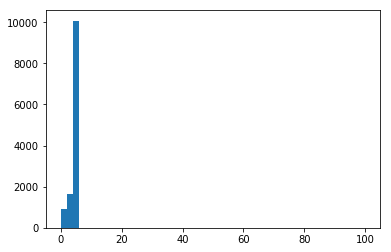

In [50]:
a = plt.hist(tarea,bins=50,range=(0,100))

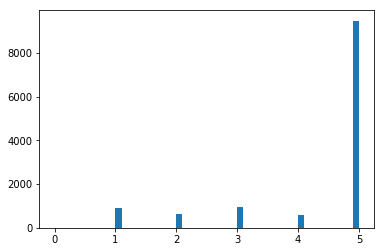

In [45]:
a = plt.hist(tarea,bins=50,range=(0,5))

In [46]:
sum(tarea)

333786

In [47]:
mask = get_gt_mask(1)

In [49]:
np.product(shape(mask))

307200